**Studi Kasus 10: Masalah Tanggal "Palsu"**

- Skenario:
- Anda dapat data penjualan harian. Sekilas kolom tanggalnya terlihat benar, tapi ada masalah tersembunyi yang sering menipu pemula.

In [1]:
import pandas as pd

data = {
    'tanggal': ['01-01-2024', '15-01-2024', '20-02-2024', '05-03-2024'],
    'omzet': [500000, 650000, 450000, 800000]
}

df = pd.DataFrame(data)

print("--- Data Awal ---")
print(df)
print("\n--- Cek Tipe Data ---")
print(df.info())

--- Data Awal ---
      tanggal   omzet
0  01-01-2024  500000
1  15-01-2024  650000
2  20-02-2024  450000
3  05-03-2024  800000

--- Cek Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tanggal  4 non-null      object
 1   omzet    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
None


In [2]:
# format eksplicit untuk konversi tanggal
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%d-%m-%Y')

print("\n--- Data Setelah Konversi Tipe ---")
print(df)
df.info()


--- Data Setelah Konversi Tipe ---
     tanggal   omzet
0 2024-01-01  500000
1 2024-01-15  650000
2 2024-02-20  450000
3 2024-03-05  800000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  4 non-null      datetime64[ns]
 1   omzet    4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes


In [3]:
df['tanggal'] = pd.to_datetime(df['tanggal'], dayfirst=True)
print("\n--- Data Setelah Konversi Tipe ---")
print(df)
df.info()

#Kapan dipakai: Ini bagus untuk data yang mungkin formatnya sedikit campur aduk tapi konsisten 
# (misal: kadang pakai -, kadang pakai /) tapi urutannya selalu Hari-Bulan-Tahun.


--- Data Setelah Konversi Tipe ---
     tanggal   omzet
0 2024-01-01  500000
1 2024-01-15  650000
2 2024-02-20  450000
3 2024-03-05  800000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   tanggal  4 non-null      datetime64[ns]
 1   omzet    4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes


In [4]:
#aksesor .dt untuk ekstrak bagian dari tanggal
# Mengambil Tahun (Angka)
df['tahun'] = df['tanggal'].dt.year

# Mengambil nama bulan
df['bulan'] = df['tanggal'].dt.month_name()

# Mengambil nama hari
df['hari'] = df['tanggal'].dt.day_name()

print("--- Data dengan Bulan & Hari ---")
print(df)

--- Data dengan Bulan & Hari ---
     tanggal   omzet  tahun     bulan     hari
0 2024-01-01  500000   2024   January   Monday
1 2024-01-15  650000   2024   January   Monday
2 2024-02-20  450000   2024  February  Tuesday
3 2024-03-05  800000   2024     March  Tuesday



--- Kinerja Harian ---
      hari    omzet
0   Monday  1150000
1  Tuesday  1250000


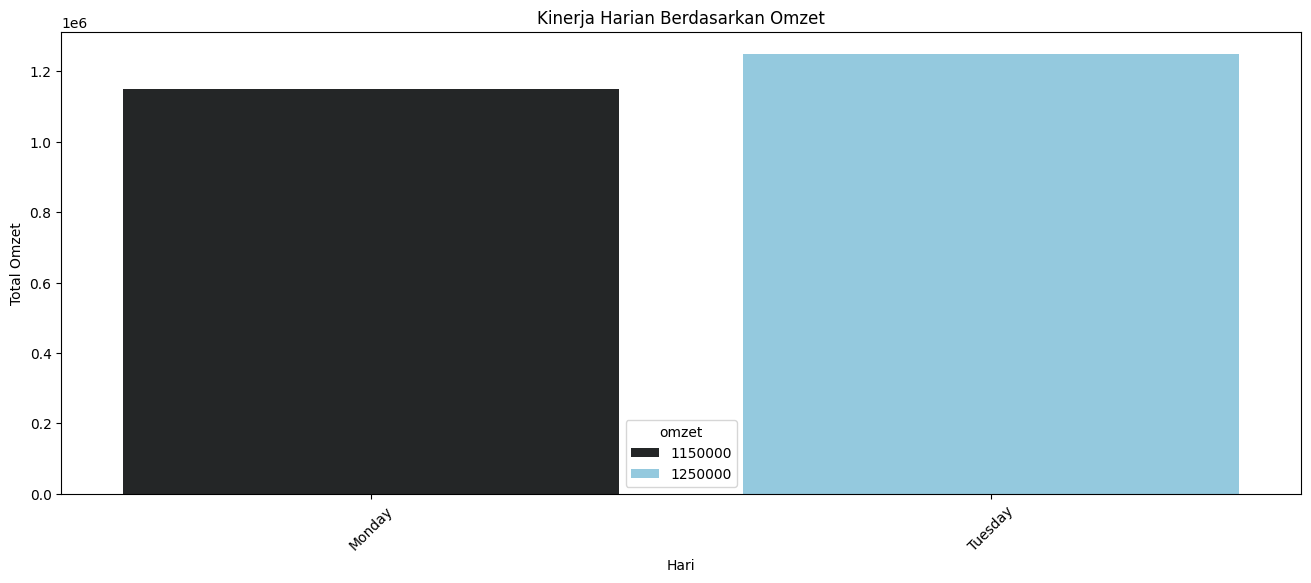

In [15]:
# agregasi omzet berdasarkan hari
kinerja_harian = df.groupby('hari', as_index=False)['omzet'].sum()
print("\n--- Kinerja Harian ---")
print(kinerja_harian)

# Visualisasi kinerja harian
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.barplot(data=kinerja_harian, x='hari', y='omzet', hue='omzet', palette='dark:skyblue')
plt.title('Kinerja Harian Berdasarkan Omzet')
plt.xlabel('Hari')
plt.ylabel('Total Omzet')
plt.xticks(rotation=45)
plt.show()
